# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random
import numpy as np
import cv2
import os
from livelossplot import PlotLossesKeras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping 

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "leafdiseases",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5932 files belonging to 4 classes.


### Validation Image Preprocessing

In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'leafdiseases',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5932 files belonging to 4 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [3]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [4]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [14]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Num of images: 1584
Single image shape before flattening: (128, 128, 3)


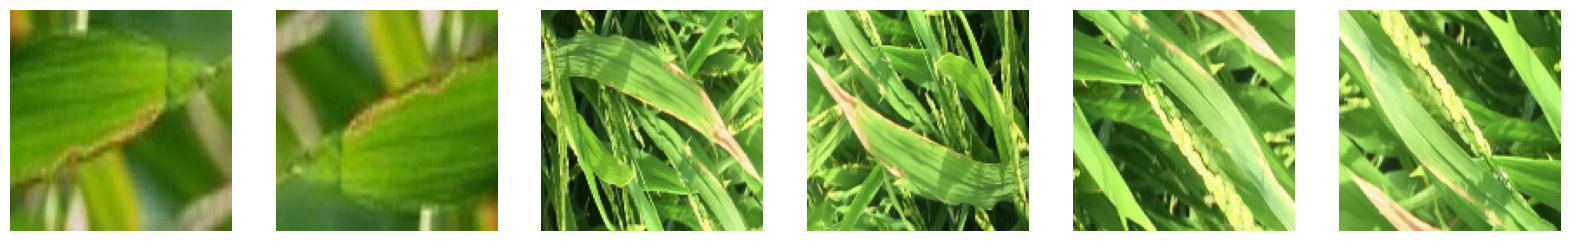

Num of images: 1440
Single image shape before flattening: (128, 128, 3)


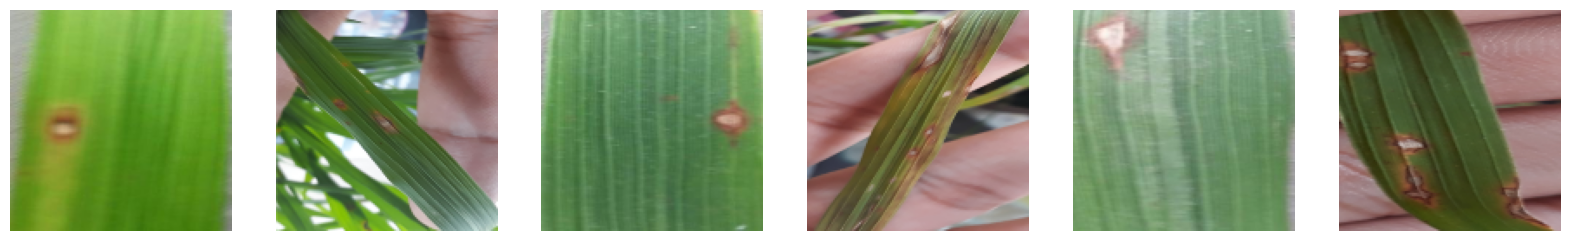

Num of images: 1600
Single image shape before flattening: (128, 128, 3)


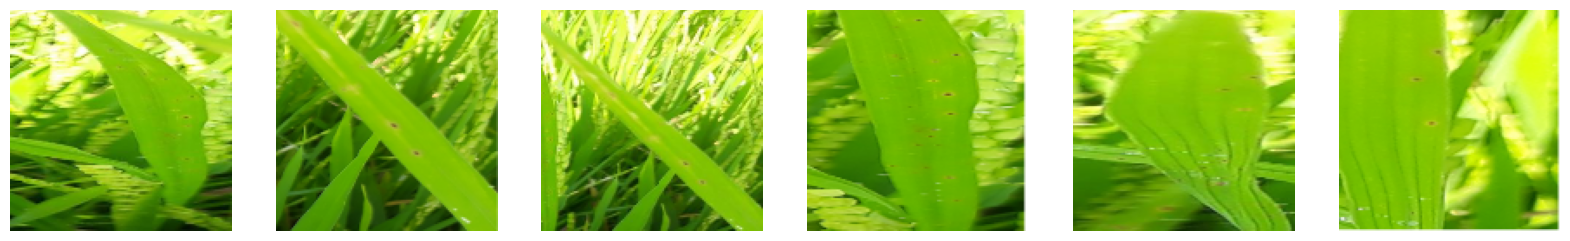

Num of images: 1308
Single image shape before flattening: (128, 128, 3)


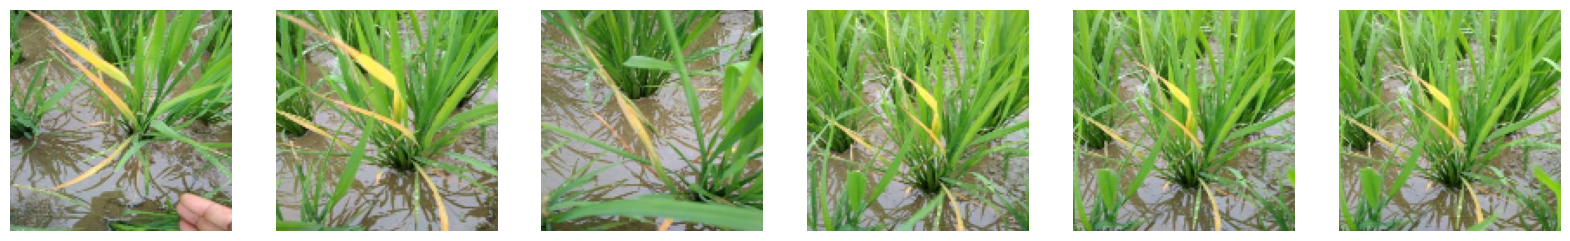

Disease: Bacterialblight --- Images: 1584
Disease: Blast --- Images: 1440
Disease: Brownspot --- Images: 1600
Disease: Tungro --- Images: 1308


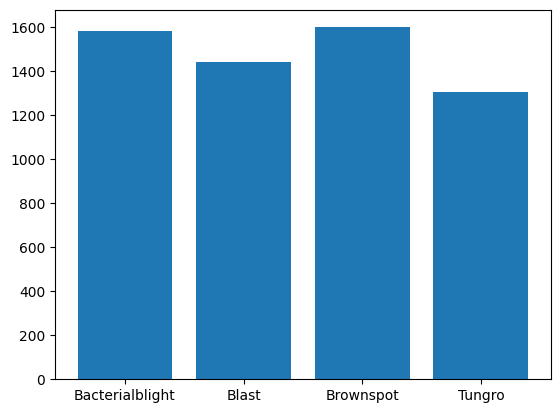

Num of images: 1564
Single image shape after flattening: (49152,)
Num of images: 1564
Single data shape with label: (49153,) --- Class label: 0

Num of images: 1420
Single image shape after flattening: (49152,)
Num of images: 1420
Single data shape with label: (49153,) --- Class label: 1

Num of images: 1580
Single image shape after flattening: (49152,)
Num of images: 1580
Single data shape with label: (49153,) --- Class label: 2

Num of images: 1288
Single image shape after flattening: (49152,)
Num of images: 1288
Single data shape with label: (49153,) --- Class label: 3



MemoryError: Unable to allocate 242. MiB for an array with shape (1288, 49153) and data type int32

In [36]:
#training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# In[10]:


# Define functions for loading and resizing images
def load_and_resize_image(file_path, target_shape=(128, 128)):
    image = cv2.imread(file_path)
    resized_image = cv2.resize(image, target_shape)
    return resized_image


# In[11]:


# Define the function to load each image class (target) stored by individual directory. 
# Each class directory containing their respective images
def load_image_class_by_directory(image_dir):
    # Load and resize images
    image_files = os.listdir(image_dir)
    images = []
    for file in image_files:
        if file.endswith('.jpg') or file.endswith('.JPG'):  # Assuming images are in jpg or JPG format
            image_path = os.path.join(image_dir, file)
            resized_image = load_and_resize_image(image_path)
            images.append(resized_image)

    print(f"Num of images: {len(images)}")        
    print(f"Single image shape before flattening: {images[0].shape}")
    return images


# In[12]:


# Display some images
def display_images(images, num_images_to_display = 6):
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 5))
    for i in range(num_images_to_display):
        # Convert the image to a supported depth (e.g., CV_8U) before color conversion
        image = images[i].astype(np.uint8)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
        axes[i].axis('off')
    plt.show()


# In[13]:


# Define the directory containing images
image_dir = "leafdiseases/Bacterialblight"
images_Bacterialblight = load_image_class_by_directory(image_dir)
display_images(images_Bacterialblight)


# In[14]:


# Define the directory containing images
image_dir = "leafdiseases/Blast"
images_Blast = load_image_class_by_directory(image_dir)
display_images(images_Blast)


# In[15]:


# Define the directory containing images
image_dir = "leafdiseases/Brownspot"
images_Brownspot = load_image_class_by_directory(image_dir)
display_images(images_Brownspot)


# In[16]:


# Define the directory containing images
image_dir = "leafdiseases/Tungro"
images_Tungro = load_image_class_by_directory(image_dir)
display_images(images_Tungro)



# Define class labels
classes = {'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3} 
inverted_classes = {0: 'Bacterialblight', 1: 'Blast', 2: 'Brownspot', 3: 'Tungro'}

images_lst_lst = [images_Bacterialblight, images_Blast, images_Brownspot, images_Tungro]
# Dictionary to store the number of image samples
classes_dict = {}
for i, images in enumerate(images_lst_lst):
    classes_dict.update({inverted_classes[i]: len(images)})
    print(f'Disease: {inverted_classes[i]} --- Images: {len(images)}')


# In[18]:


# Now, plot the classes
plt.bar(*zip(*classes_dict.items()))
plt.show()

# Function to flatten the RGB values from 2D to 1D, returns a numpy array
def flatten_images(images):
    data_flattened = []
    for image in images:
        flattened_image = image.reshape(-1)  # Flatten the image
        data_flattened.append(flattened_image)
        
        
    print(f"Num of images: {len(data_flattened)}")
    print(f"Single image shape after flattening: {data_flattened[0].shape}")
    
    # Convert data to numpy array for further processing
    data_flattened = np.array(data_flattened)
    return data_flattened


# In[20]:


# Function to assign class labels: returns a numpy array
def assign_image_class_label(images, class_label = int):
    data_labeled = []
    # Flatten the images
    data_flattened = flatten_images(images)
    
    for image in data_flattened:
        # Assign class label
        data_labeled.append(np.concatenate([image, [class_label]]))
    
    print(f"Num of images: {len(data_labeled)}")
    print(f"Single data shape with label: {data_labeled[0].shape} --- Class label: {class_label}\n")
    
    # Convert data to numpy array for further processing
    data_labeled = np.array(data_labeled)
    return data_labeled


# In[21]:


# Function to concatenate the arrays into a pandas dataframe, horizontally
def concat_arrays_to_dataframe(arrays = []):
    # Combine to a single dataframe, vertically
    dataset = np.concatenate(arrays, axis = 0)

    # Number of pixel columns, excluding the last label column
    num_pix = dataset.shape[1] - 1

    # Modify the column names
    col_lst = [f"pixel{col}" for col in range(num_pix)]
    # Append the name of the last column as label
    col_lst.append("label")

    # Convert to a dataframe and add column names
    df_dataset = pd.DataFrame(dataset, columns = col_lst)
    
    return df_dataset


# In[22]:


# Split the image files into train - test set.
def split_train_test_files(images_lst_lst = [], num_test_set = int):
    train_images_lst_lst = []
    test_images_lst_lst = []
    # Iterate through the first class of images
    for images in images_lst_lst:
        train_set = images[num_test_set:]
        test_set = images[:num_test_set]
        
        train_images_lst_lst.append(train_set)
        test_images_lst_lst.append(test_set)
        
    return train_images_lst_lst, test_images_lst_lst


# In[23]:


# Number of images to set aside as test set per class
num_test_set = 20

# Split the image files into train - test set.
train_images, test_images = split_train_test_files(images_lst_lst, num_test_set)


# In[24]:


images_lst_array = []
# Iterate through the classes, the class index i will represent the class name/label
for i, images in enumerate(train_images):
    # Assign label to each of the images
    labeled = assign_image_class_label(images, i)
    images_lst_array.append(labeled)


# In[25]:


# Concatenate arrays to dataframe
df_images = concat_arrays_to_dataframe(images_lst_array)
df_images.head()


# # ✂️ Train Val Split

# In[26]:


from sklearn.model_selection import train_test_split
import random


# In[27]:


X_images = df_images.drop("label", axis = 1)
y_images = df_images["label"]


# In[28]:


X_train, X_val, y_train, y_val = train_test_split(X_images, y_images, test_size = 0.25, random_state = 2, shuffle=True)
print("Shape of train X:", X_train.shape)
print("Shape of train Y:", y_train.shape)
print("Shape of val X:", X_val.shape)
print("Shape of val Y:", y_val.shape)


# Display some images before scaling
X_train_RGB = np.array(X_train).reshape(-1, 128, 128, 3)
display_images(X_train_RGB)


# In[30]:


# Display some images before scaling
X_val_RGB = np.array(X_val).reshape(-1, 128, 128, 3)
display_images(X_val_RGB)


from sklearn.preprocessing import MinMaxScaler


# In[32]:


# The pixel values ranges from 0 to 255. The MinMaxScaler makes it from 0 to 1. 
# This reduces the magnitude sensitivity of the activation function for the choosen ML algorithm.
scaler = MinMaxScaler(feature_range = (0, 1))

# Convert to numpy array to remove feature names before fitting
scaler = scaler.fit(np.array(X_train))
X_train_np = scaler.transform(np.array(X_train))
X_val_np = scaler.transform(np.array(X_val))

# Reshape to RGB format
X_train_RGB = np.array(X_train_np).reshape(-1, 128, 128, 3)
X_val_RGB = np.array(X_val_np).reshape(-1, 128, 128, 3)

# Reshape targets
y_train = y_train.values.reshape(len(y_train), 1)
y_val = y_val.values.reshape(len(y_val), 1)


# # 🏗️ Building Model

# In[36]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping 

# Target variable needs one-hot encoding to ensure each example has a probability of 1.0 for its actual class and 0.0 for others.
# Use Keras to_categorical() function for achieving this.
from tensorflow.keras.utils import to_categorical

# Draw live chart of accuracy of neural network
from livelossplot import PlotLossesKeras


# In[37]:


# Shape of a single image
input_shape = X_train_RGB[0].shape
num_train_images = len(X_train_RGB)
# Number of classes to be predicted
num_classes = 4


# In[39]:


# Initialize Image Augmentation
train_datagen = ImageDataGenerator(rotation_range = 10,  # rotation
                                   width_shift_range = 0.1,  # horizontal shift
                                   height_shift_range = 0.1,
                                   zoom_range = 0.1) # zoom



# Initialize regularization parameters - how many epochs to wait before training stops, if there is no further improvement
monitor_val_loss = EarlyStopping(monitor = "val_loss", 
                                 min_delta = 1e-3, 
                                 patience = 20, # Wait 5 more epochs
                                 verbose = 1, 
                                 mode = "auto", 
                                 restore_best_weights = True)



import tensorflow as tf
from tensorflow.keras import mixed_precision

# Enable mixed precision training if applicable
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Restrict GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Adjust batch size to manage memory usage
epochs = 150
batch_size = 32  # Reduced batch size to manage memory

# Using the flow method to augment the image on the fly.
training_data = train_datagen.flow(X_train_RGB, to_categorical(y_train), batch_size=batch_size)
# Model evaluation
validation_data = (X_val_RGB, to_categorical(y_val))

history = model.fit(training_data,
                    epochs=epochs,
                    steps_per_epoch=num_train_images // batch_size, # Number of iterations per epoch
                    validation_data=validation_data, 
                    callbacks=[PlotLossesKeras(), monitor_val_loss], # Live chart
                    verbose=1)  # Ensure verbose is set to 1 for progress output

## Evaluating Model

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 48s 22ms/step - loss: 0.0216 - accuracy: 0.9929
Training accuracy: 0.9929013252258301


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 12s 22ms/step - loss: 0.1064 - accuracy: 0.9675
Validation accuracy: 0.9675050973892212


### Saving Model

In [26]:
cnn.save('trained_rice_disease_model.keras')

In [27]:
training_history.history #Return Dictionary of history

{'loss': [1.4136191606521606,
  0.4477913975715637,
  0.2676381468772888,
  0.19111236929893494,
  0.13942082226276398,
  0.10994475334882736,
  0.0908212810754776,
  0.07104645669460297,
  0.06562896817922592,
  0.05488068610429764],
 'accuracy': [0.5846646428108215,
  0.8577139377593994,
  0.9144889116287231,
  0.9370367527008057,
  0.9548047780990601,
  0.9637100696563721,
  0.9700120687484741,
  0.976385235786438,
  0.9778931736946106,
  0.9823031425476074],
 'val_loss': [0.5296195149421692,
  0.25329381227493286,
  0.2263505607843399,
  0.16378135979175568,
  0.1585691124200821,
  0.16677743196487427,
  0.09424994885921478,
  0.12383869290351868,
  0.1040886640548706,
  0.10639382153749466],
 'val_accuracy': [0.8316640257835388,
  0.9187912344932556,
  0.9239699244499207,
  0.9488959908485413,
  0.9504324793815613,
  0.9491236209869385,
  0.9688140153884888,
  0.9629524350166321,
  0.968529462814331,
  0.9675050973892212]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [29]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

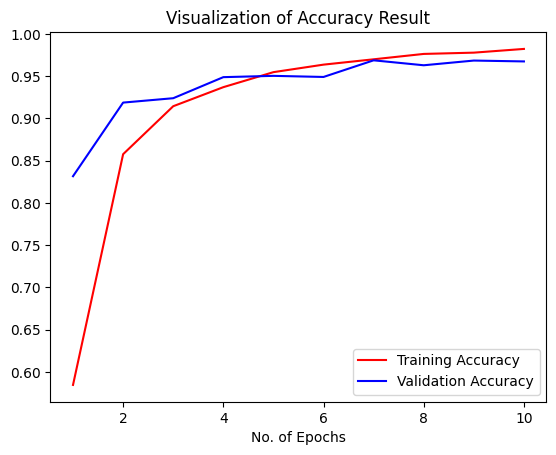

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names

In [33]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'leafdiseases',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [34]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 51s 3ms/step


In [35]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [36]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [39]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.99      0.92      0.95       502
                               Blueberry___healthy       0.95      0.96      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.93      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

### Confusion Matrix Visualization

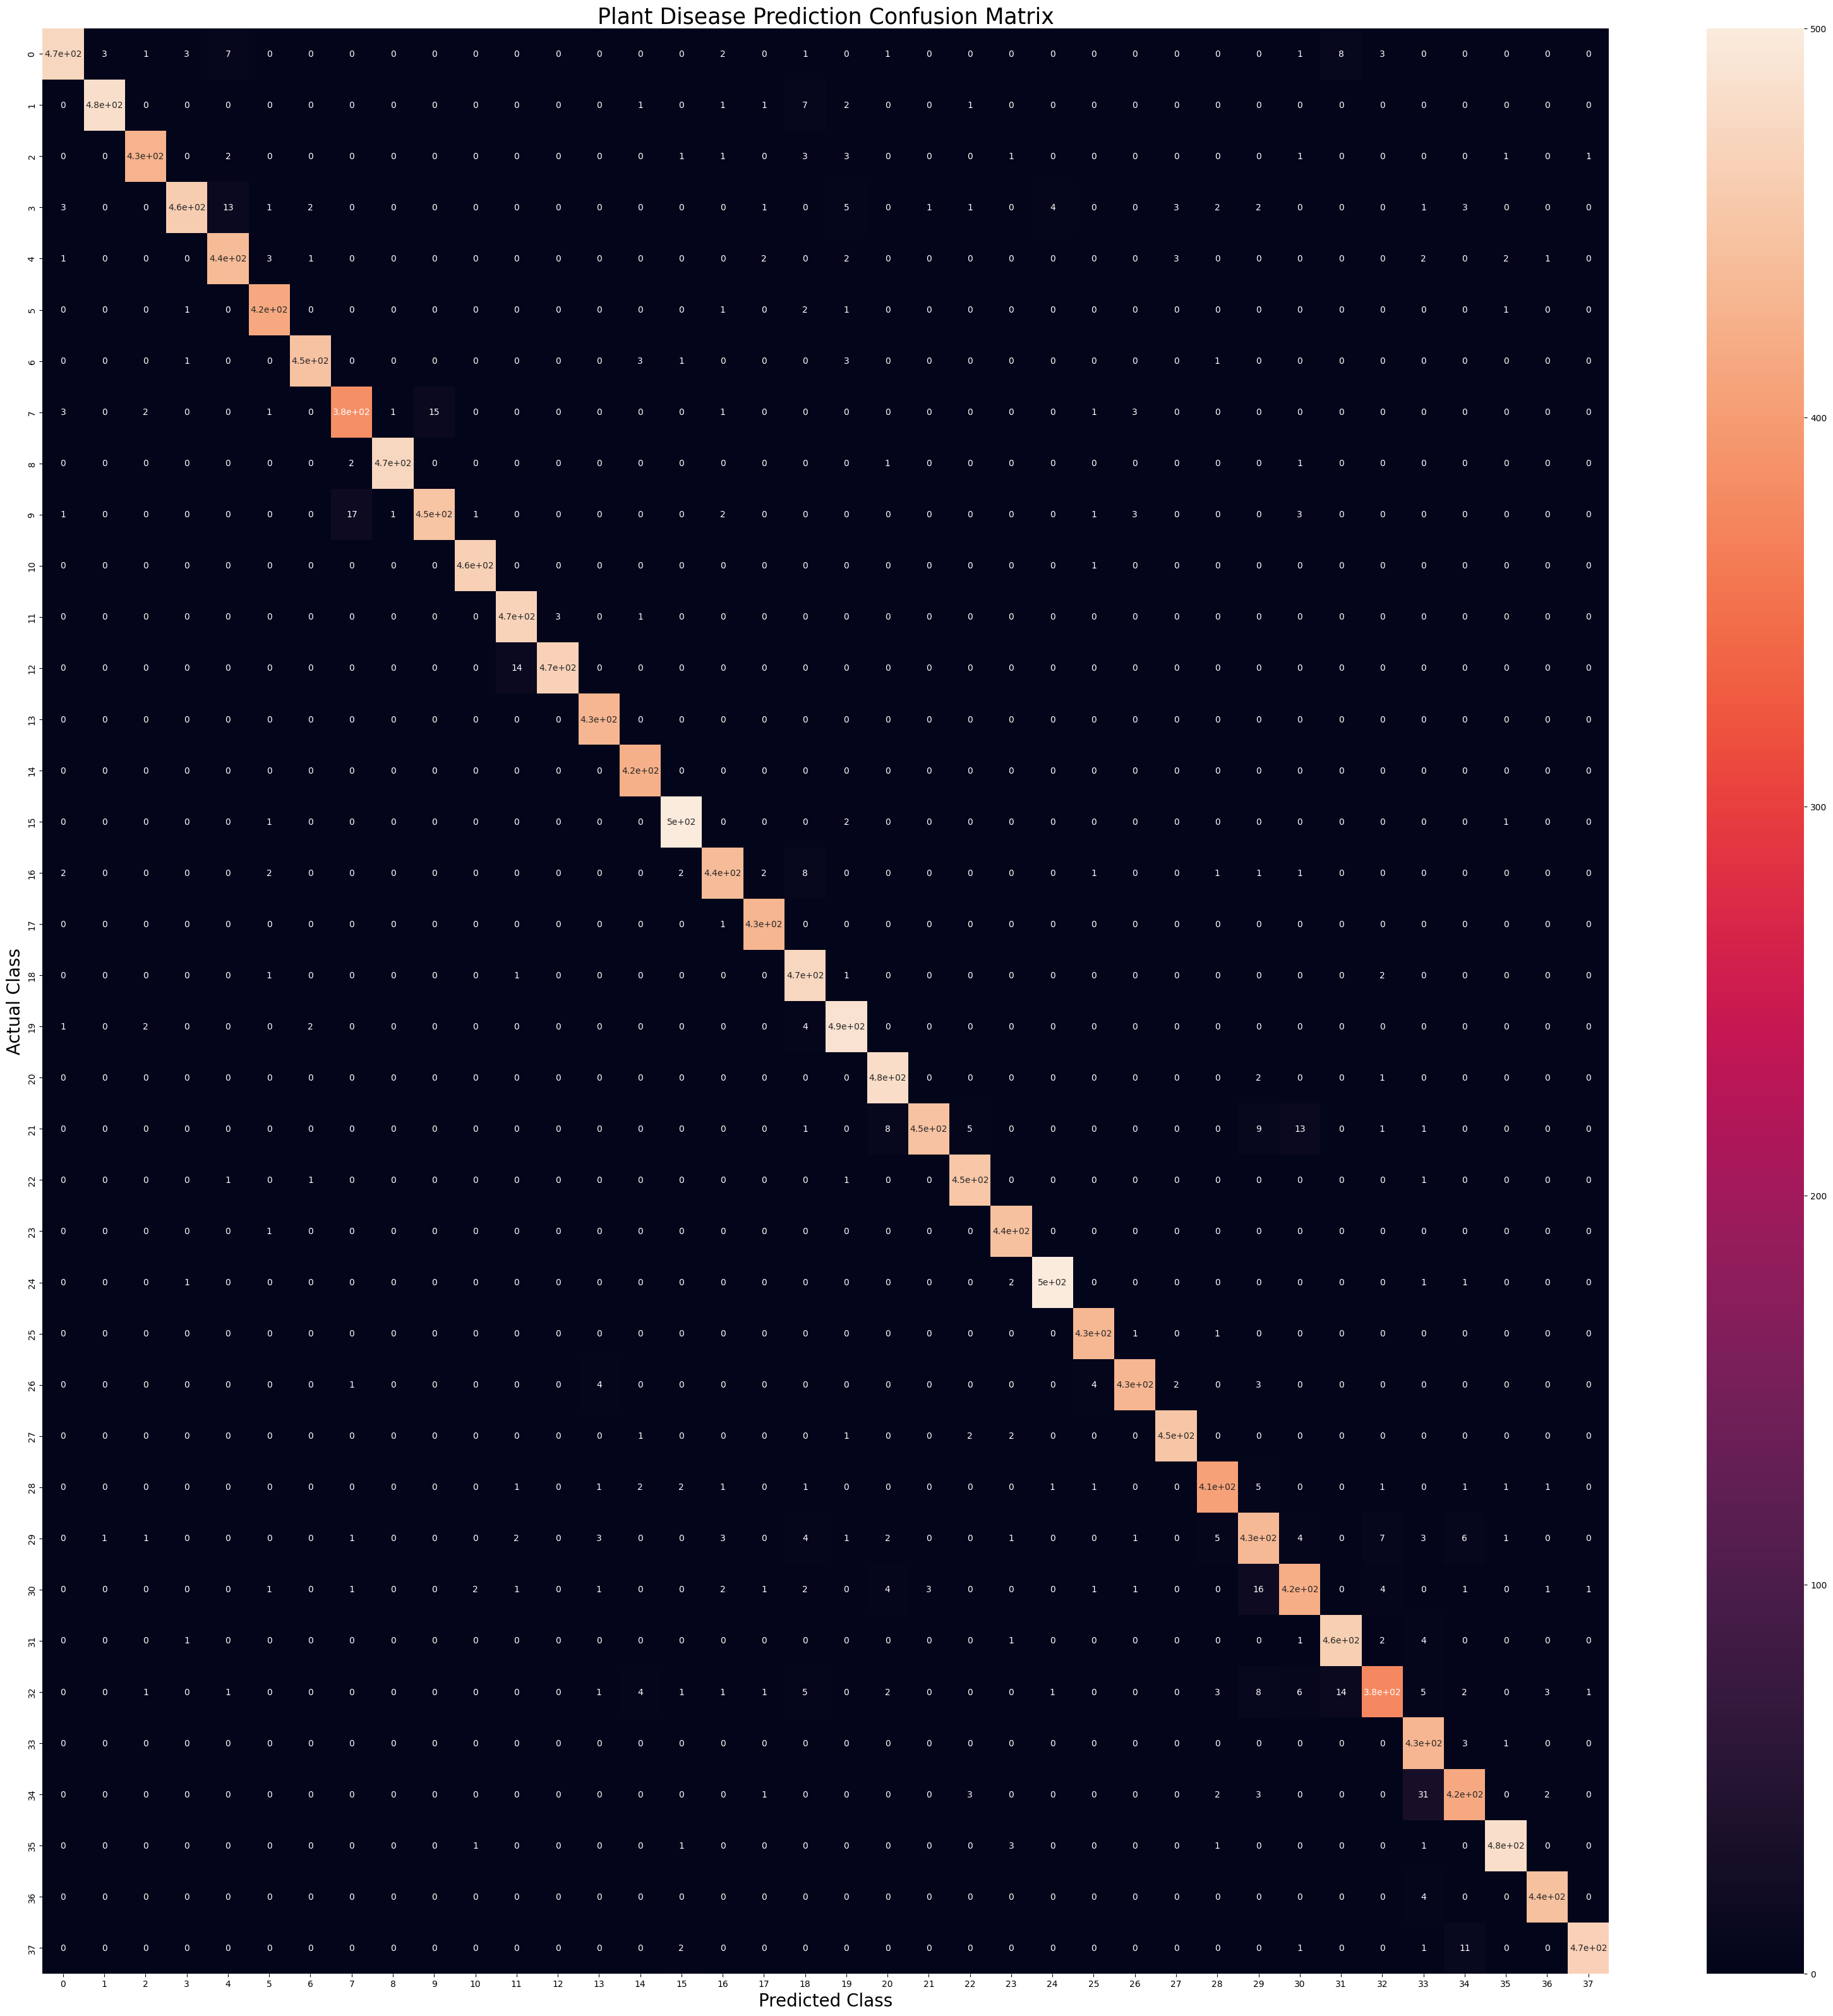

In [40]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()